In [28]:
# import libraries
import os
import zipfile
import random
from IPython.display import display
import yaml

In [27]:
base_dir = "/content/drive/MyDrive"

zip_file = os.path.join(base_dir, 'BD Tk Dataset.zip')

extact_dir = os.path.join(base_dir, "BD TAKA PROJECT","BD Tk Dataset")

os.makedirs(extact_dir, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as rf:
  rf.extractall(extact_dir)

print('extrack succesfully')

extrack succesfully


##Total number of images collected per class

In [29]:
BASE_DIR = "/content/drive/MyDrive/BD TAKA PROJECT/BD Tk Dataset"

with open(os.path.join(BASE_DIR, "data.yaml")) as f:
    data = yaml.safe_load(f)
classes = data['names']

image_counts = {name: 0 for name in classes}

def count_images(split):
    labels_path = os.path.join(BASE_DIR, split, "labels")
    if os.path.exists(labels_path):
        for label_file in os.listdir(labels_path):
            if label_file.endswith(".txt"):
                label_path = os.path.join(labels_path, label_file)
                with open(label_path, "r") as f:
                    lines = f.readlines()
                    classes_in_image = set()
                    for line in lines:
                        class_id = int(line.split()[0])
                        classes_in_image.add(class_id)
                    for cid in classes_in_image:
                        image_counts[classes[cid]] += 1

for split in ["train", "val", "test"]:
    count_images(split)

print("Total number of images collected per class:")
for cls, cnt in image_counts.items():
    print(f"{cls}: {cnt}")


Total number of images collected per class:
2 Taka: 50
5 Taka: 50
10 Taka: 50
20 Taka: 50
50 Taka: 50
100 Taka: 50
200 Taka: 46
500 Taka: 50
1000 Taka: 50


##Sample images from each denomination


Sample images for class '2 Taka':


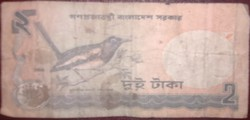

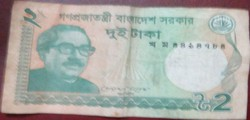


Sample images for class '5 Taka':


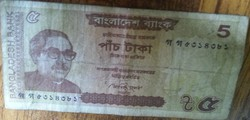

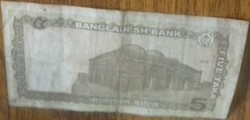


Sample images for class '10 Taka':


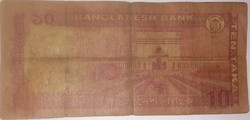

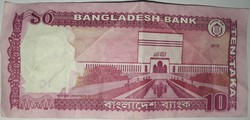


Sample images for class '20 Taka':


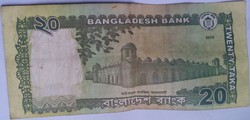

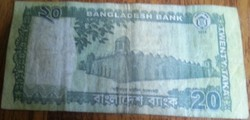


Sample images for class '50 Taka':


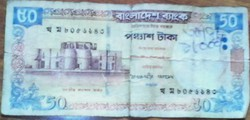

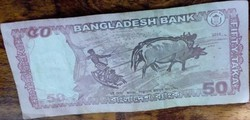


Sample images for class '100 Taka':


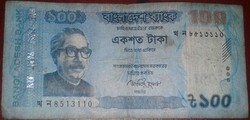

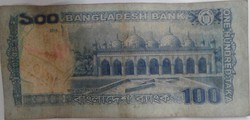


Sample images for class '200 Taka':


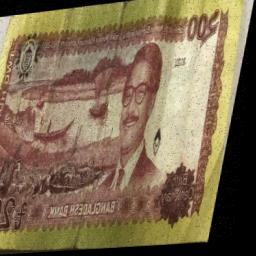

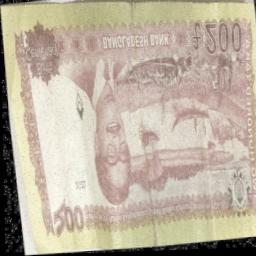


Sample images for class '500 Taka':


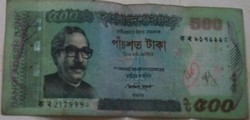

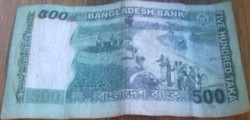


Sample images for class '1000 Taka':


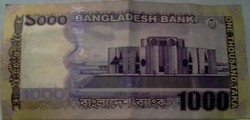

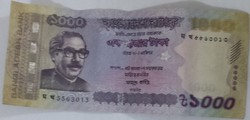

In [30]:
BASE_DIR = "/content/drive/MyDrive/BD TAKA PROJECT/BD Tk Dataset"

with open(os.path.join(BASE_DIR, "data.yaml")) as f:
    classes = yaml.safe_load(f)['names']

def show_samples(n=2):
    labels_path = os.path.join(BASE_DIR, "train", "labels")
    images_path = os.path.join(BASE_DIR, "train", "images")

    for cid, cls_name in enumerate(classes):
        imgs = [f.replace(".txt",".jpg") for f in os.listdir(labels_path)
                if f.endswith(".txt") and cid in [int(line.split()[0])
                for line in open(os.path.join(labels_path,f))]]
        if imgs:
            print(f"\nSample images for class '{cls_name}':")
            for img_file in random.sample(imgs, min(n, len(imgs))):
                try:
                    display(Image.open(os.path.join(images_path, img_file)))
                except:
                    print(f"Cannot open: {img_file}")

show_samples(n=2)

##- Folder structure of the dataset

In [31]:
BASE_DIR = "/content/drive/MyDrive/BD TAKA PROJECT/BD Tk Dataset"

def print_structure(path, prefix=""):
    items = os.listdir(path)
    folders = [i for i in items if os.path.isdir(os.path.join(path, i))]
    files = [i for i in items if os.path.isfile(os.path.join(path, i)) and i == "data.yaml"]

    for folder in sorted(folders):
        print(f"{prefix}├── {folder}/")
        print_structure(os.path.join(path, folder), prefix + "│   ")

    for file in files:
        print(f"{prefix}├── {file}")

print(BASE_DIR)
print_structure(BASE_DIR)

/content/drive/MyDrive/BD TAKA PROJECT/BD Tk Dataset
├── test/
│   ├── images/
│   ├── labels/
├── train/
│   ├── images/
│   ├── labels/
├── val/
│   ├── images/
│   ├── labels/
├── data.yaml


##Dataset split statistics

In [32]:
base_dir = "/content/drive/MyDrive/BD TAKA PROJECT/BD Tk Dataset"

for split in ["train", "val", "test"]:
    path = os.path.join(base_dir, split, "images")
    print(f"{split.upper()} images: {len(os.listdir(path))}")


TRAIN images: 312
VAL images: 62
TEST images: 72


In [33]:
!pip install ultralytics

In [36]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

#Model Training

In [37]:
base_dir = '/content/drive/MyDrive/BD TAKA PROJECT'

model = YOLO('yolo11n.pt')

data_yaml = os.path.join(base_dir,'BD Tk Dataset','data.yaml')

model.train(
    data = data_yaml,
    epochs = 50,
    imgsz = 640,
    batch = 16,
    project = os.path.join(base_dir,'runs','detect'),
    name = 'BD Taka detect',
    device = 0

)

Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/BD TAKA PROJECT/BD Tk Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=BD Taka detect, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c06fe3aefc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

#Model Evaluation

In [38]:
train_model_path = os.path.join(base_dir,'runs','detect','BD Taka detect','weights','best.pt' )

train_model = YOLO(train_model_path)

test_image_dir = os.path.join(base_dir, 'BD Tk Dataset','test', 'images')
test_images = [os.path.join(test_image_dir, f) for f in os.listdir(test_image_dir)[10:30:2]]

results = train_model.predict(
    source= test_images,
    save = True,
    project = os.path.join(base_dir,'runs','detect'),
    name = 'infer image',
    exist_ok=True
)


0: 640x640 1 100 Taka, 5.1ms
1: 640x640 1 100 Taka, 5.1ms
2: 640x640 1 100 Taka, 5.1ms
3: 640x640 1 10 Taka, 5.1ms
4: 640x640 1 10 Taka, 5.1ms
5: 640x640 1 10 Taka, 5.1ms
6: 640x640 1 10 Taka, 5.1ms
7: 640x640 1 200 Taka, 5.1ms
8: 640x640 1 200 Taka, 5.1ms
9: 640x640 1 200 Taka, 5.1ms
Speed: 4.2ms preprocess, 5.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/BD TAKA PROJECT/runs/detect/infer image


##Sample inference images with bounding boxes

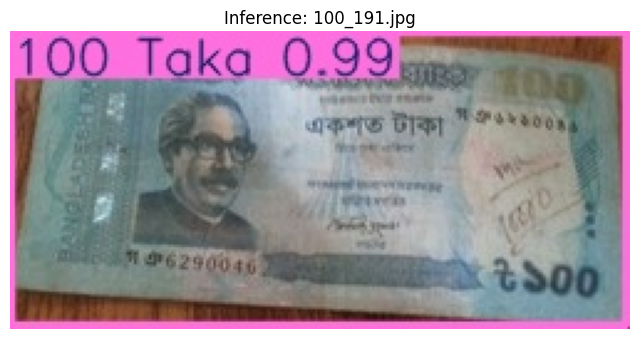

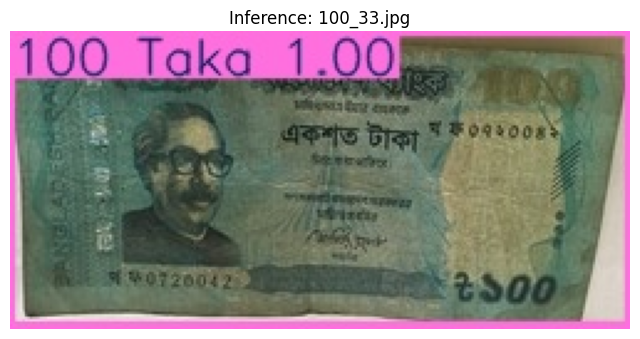

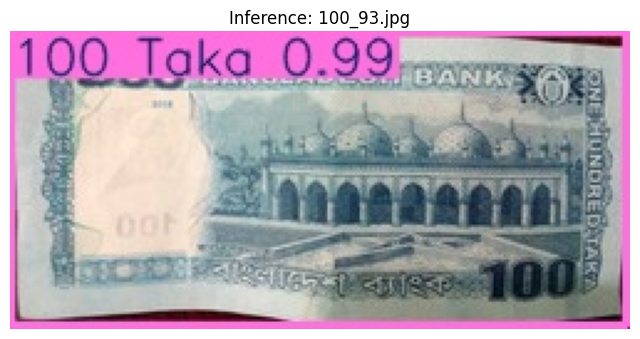

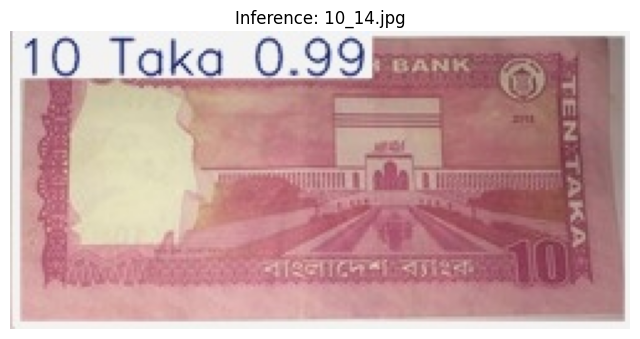

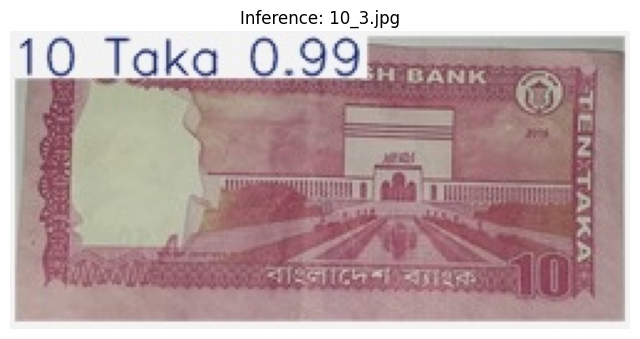

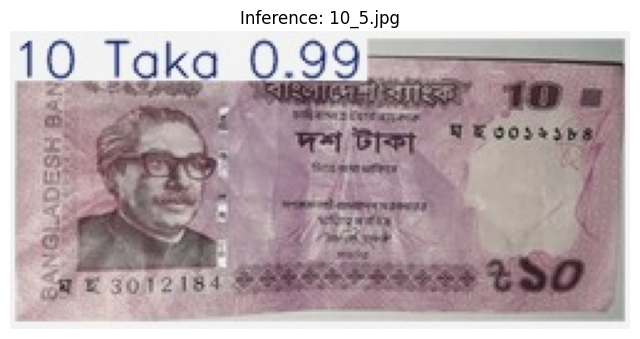

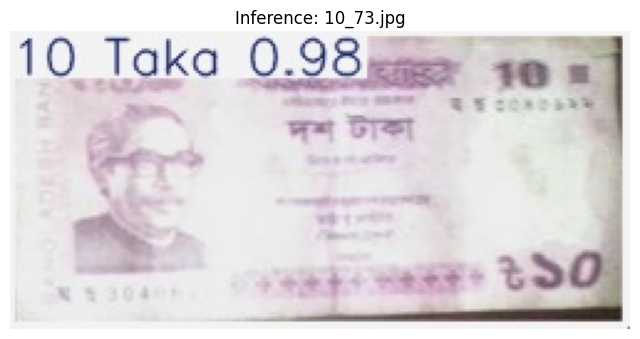

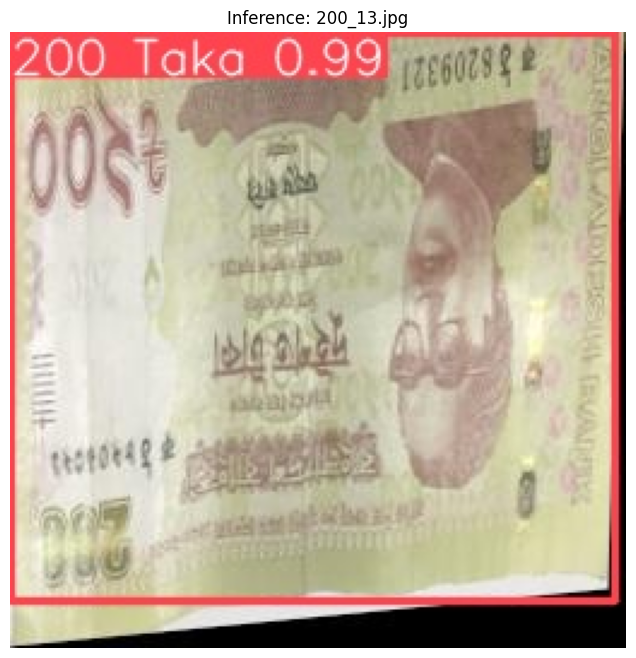

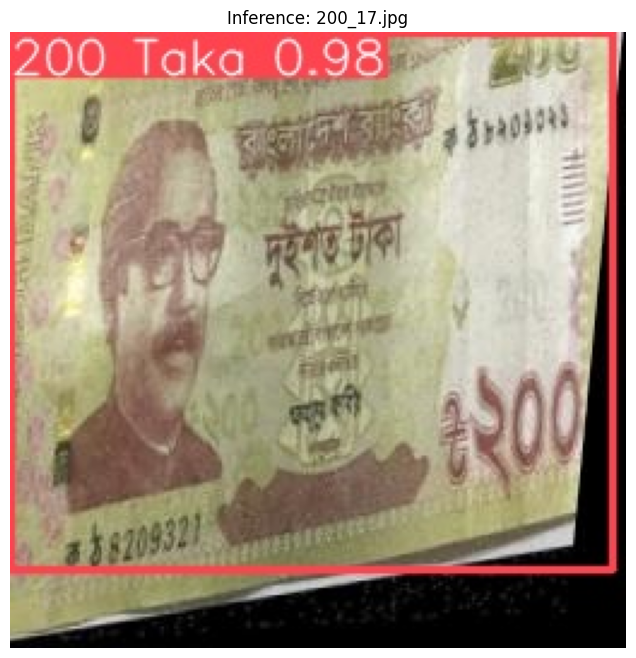

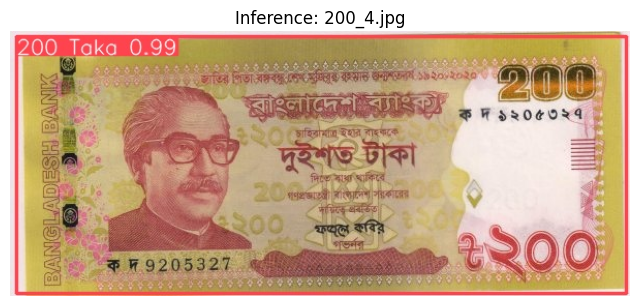

In [ ]:
output_dir = os.path.join(base_dir,'runs','detect', 'infer image')
inferred_images = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith(('.jpg', '.png'))]


for img_path in inferred_images:
    img = Image.open(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Inference: {os.path.basename(img_path)}")
    plt.show()